<a href="https://colab.research.google.com/github/YoshifumiMiyagi/VinDr-PCXR/blob/main/VinDr_PCXR_meta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [27]:
annotation = pd.read_csv('/content/drive/MyDrive/annotations_train.csv')
annotation_test = pd.read_csv('/content/drive/MyDrive/annotations_test.csv')

In [17]:
annotation

,image_id,rad_ID,class_name,x_min,y_min,x_max,y_max,class_id
0,03d56a9709a81b2e9d6afbc6647c8730,R3,Boot-shaped heart,378.760010,401.416645,835.143248,661.678438,0
1,48f7ba0b0fd5ab847ee87df2aed5cfc9,R3,Peribronchovascular interstitial opacity,247.196368,412.000819,441.763442,830.320028,1
2,48f7ba0b0fd5ab847ee87df2aed5cfc9,R3,Peribronchovascular interstitial opacity,613.631024,364.980443,902.238850,827.077243,1
3,74f8648d742bbcce79d67c967de5552d,R3,Peribronchovascular interstitial opacity,1008.515903,665.439667,1324.430364,1265.465119,1
4,74f8648d742bbcce79d67c967de5552d,R3,Peribronchovascular interstitial opacity,453.015307,635.756429,724.404911,1242.142575,1
...,...,...,...,...,...,...,...,...
10366,5fac26aaebaab98a10f1f99fff3d4e14,R1,No finding,NaN,NaN,NaN,NaN,7
10367,c3479c0b297b951ab065ce9474248e27,R1,No finding,NaN,NaN,NaN,NaN,7
10368,4208b18c18aa408cf5bd40d13b796687,R1,No finding,NaN,NaN,NaN,NaN,7
10369,4170427203097ce7e38cf83a90eb3e74,R1,No finding,NaN,NaN,NaN,NaN,7


In [5]:
annotation['class_name'].value_counts()

,count
class_name,
No finding,5143
Peribronchovascular interstitial opacity,2315
Reticulonodular opacity,846
Bronchial thickening,794
Lung hyperinflation,199
Consolidation,197
Other opacity,187
Diffuse aveolar opacity,173
Cardiomegaly,162


In [28]:
label = pd.read_csv('/content/drive/MyDrive/image_labels_train.csv')
label_test = pd.read_csv('/content/drive/MyDrive/image_labels_test.csv')
label

,image_id,rad_ID,No finding,Bronchitis,Brocho-pneumonia,Other disease,Bronchiolitis,Situs inversus,Pneumonia,Pleuro-pneumonia,Diagphramatic hernia,Tuberculosis,Congenital emphysema,CPAM,Hyaline membrane disease,Mediastinal tumor,Lung tumor
0,6cb53aff85c71b98ad13d67a131708c6,R3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,40414c05687cdb156823c156967b13f0,R3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0e4a464dfbf8abc6333c82f1b77b6455,R3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,f4d3fab0b71381e6b237dc36301e85a0,R3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,b58c9b1c89978a0b1f8533b7a2ca1088,R3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7723,5fac26aaebaab98a10f1f99fff3d4e14,R1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7724,c3479c0b297b951ab065ce9474248e27,R1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7725,4208b18c18aa408cf5bd40d13b796687,R1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7726,4170427203097ce7e38cf83a90eb3e74,R1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
L=[]
for i in label.columns[2:]:
    a = label[i].value_counts()
    L.append(a)
Lable = pd.DataFrame(L)
Lable.index = label.columns[2:]
Lable.columns =  ['Case','Control']
Lable

,Case,Control
No finding,5143,2585
Bronchitis,842,6886
Brocho-pneumonia,545,7183
Other disease,412,7316
Bronchiolitis,497,7231
Situs inversus,11,7717
Pneumonia,392,7336
Pleuro-pneumonia,6,7722
Diagphramatic hernia,3,7725
Tuberculosis,14,7714


from matplotlib import pyplot as plt
_df_0['Case'].plot(kind='hist', bins=20, title='Case')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Control'].plot(kind='hist', bins=20, title='Control')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='Case', y='Control', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Case'].plot(kind='line', figsize=(8, 4), title='Case')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_4['Control'].plot(kind='line', figsize=(8, 4), title='Control')
plt.gca().spines[['top', 'right']].set_visible(False)

In [30]:
label4 = label[(label['Bronchitis']==1)|(label['Brocho-pneumonia']==1)|(label['Bronchiolitis']==1)|(label['Pneumonia']==1)].loc[:,['image_id','Bronchitis','Brocho-pneumonia','Bronchiolitis','Pneumonia']]
label_test4 = label_test[(label_test['Bronchitis']==1)|(label_test['Brocho-pneumonia']==1)|(label_test['Bronchiolitis']==1)|(label_test['Pneumonia']==1)].loc[:,['image_id','Bronchitis','Brocho-pneumonia','Bronchiolitis','Pneumonia']]
label4.dtypes,label_test4.dtypes

(image_id             object
 Bronchitis          float64
 Brocho-pneumonia    float64
 Bronchiolitis       float64
 Pneumonia           float64
 dtype: object,
 image_id             object
 Bronchitis          float64
 Brocho-pneumonia    float64
 Bronchiolitis       float64
 Pneumonia           float64
 dtype: object)

In [23]:
df_label = label4.iloc[:,1:].idxmax(axis=1)
df = pd.concat([label4.iloc[:,0],df_label],axis=1)
df.columns = ['image_id','class_name']
df

,image_id,class_name
0,6cb53aff85c71b98ad13d67a131708c6,Pneumonia
1,40414c05687cdb156823c156967b13f0,Bronchiolitis
2,0e4a464dfbf8abc6333c82f1b77b6455,Bronchiolitis
3,f4d3fab0b71381e6b237dc36301e85a0,Bronchiolitis
6,11dc4e586a88cb85ac82db00460cd08a,Bronchiolitis
...,...,...
2573,571a7548a98912422fc79bc2d2291ac3,Brocho-pneumonia
2575,622dc1fc74c209767816b0489d7b55df,Pneumonia
2578,f28a594523655b3fbaf28eb5cd9035fb,Bronchitis
2581,868ea87d278cc501897d2ca0e18b8350,Bronchiolitis


In [65]:
Df = pd.merge(annotation.loc[:,["image_id","class_name","x_min","y_min","x_max","y_max"]],df,on='image_id',how='inner').drop_duplicates()
Df

,image_id,class_name_x,x_min,y_min,x_max,y_max,class_name_y
0,48f7ba0b0fd5ab847ee87df2aed5cfc9,Peribronchovascular interstitial opacity,247.196368,412.000819,441.763442,830.320028,Bronchiolitis
1,48f7ba0b0fd5ab847ee87df2aed5cfc9,Peribronchovascular interstitial opacity,613.631024,364.980443,902.238850,827.077243,Bronchiolitis
2,74f8648d742bbcce79d67c967de5552d,Peribronchovascular interstitial opacity,1008.515903,665.439667,1324.430364,1265.465119,Bronchiolitis
3,74f8648d742bbcce79d67c967de5552d,Peribronchovascular interstitial opacity,453.015307,635.756429,724.404911,1242.142575,Bronchiolitis
4,e30f04846ebdf6d40eb99757f82c5a89,Peribronchovascular interstitial opacity,671.865876,329.501798,847.363825,658.212242,Bronchiolitis
...,...,...,...,...,...,...,...
4632,898f6c0a0699396c200605a8159b8335,Consolidation,343.726118,684.468738,535.201713,858.392404,Pneumonia
4633,5036a42088d7a7e6442ef1feee8fee9d,Peribronchovascular interstitial opacity,177.998560,789.787258,541.119345,1154.829317,Bronchitis
4634,5036a42088d7a7e6442ef1feee8fee9d,Peribronchovascular interstitial opacity,739.010567,893.536054,1086.761160,1183.648427,Bronchitis
4635,a0c750721b6fd408d6faacfdbd43a59e,Peribronchovascular interstitial opacity,741.850069,400.123796,919.894085,660.207703,Brocho-pneumonia


In [66]:
df_label_test4 = label_test4.iloc[:,1:].idxmax(axis=1)
df_test = pd.concat([label_test4.iloc[:,0],df_label_test4],axis=1)
df_test.columns = ['image_id','class_name']
Df_test = pd.merge(annotation_test.loc[:,["image_id","class_name","x_min","y_min","x_max","y_max"]],df_test,on='image_id',how='inner').drop_duplicates()
Df_test

,image_id,class_name_x,x_min,y_min,x_max,y_max,class_name_y
0,754319622ab33ef050acc93f3abb30c9,Reticulonodular opacity,261.815256,423.207990,503.876077,736.463170,Bronchiolitis
1,754319622ab33ef050acc93f3abb30c9,Peribronchovascular interstitial opacity,708.559859,396.510105,927.482514,756.041619,Bronchiolitis
2,06d3af071602023190578f5c957498c3,Peribronchovascular interstitial opacity,608.657762,258.905311,850.583057,688.823511,Bronchiolitis
3,06d3af071602023190578f5c957498c3,Peribronchovascular interstitial opacity,184.903264,255.823461,380.600796,685.741660,Bronchiolitis
4,e52a0ff39ea6942d1860a4e619cb8518,Peribronchovascular interstitial opacity,325.547761,492.778816,572.221416,708.227958,Bronchitis
...,...,...,...,...,...,...,...
828,c6c7c3af3c83716324f298756073cd0d,Diffuse aveolar opacity,145.287769,213.177419,379.882358,655.257889,Pneumonia
829,c6c7c3af3c83716324f298756073cd0d,Diffuse aveolar opacity,470.592265,215.262705,743.764631,623.978610,Pneumonia
830,2eccdd37503e1416f1d1af8bcce3be75,Peribronchovascular interstitial opacity,261.103452,356.471753,494.859640,786.170627,Bronchiolitis
831,2eccdd37503e1416f1d1af8bcce3be75,Cardiomegaly,357.356000,377.097299,903.932967,813.671355,Bronchiolitis


In [69]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le2 = LabelEncoder()

Df["class_name_x"] = le.fit_transform(Df["class_name_x"])
Df_test["class_name_x"] = le.transform(Df_test["class_name_x"])

x_train, y_train = Df.iloc[:,1:-1], le2.fit_transform(Df["class_name_y"])
x_test, y_test = Df_test.iloc[:,1:-1], le2.transform(Df_test["class_name_y"])

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((4637, 5), (833, 5), (4637,), (833,))

In [70]:
le2.classes_

array(['Brocho-pneumonia', 'Bronchiolitis', 'Bronchitis', 'Pneumonia'],
      dtype=object)

# Model

In [48]:
!pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 30.2 MB/s eta 0:00:00


In [55]:
from xgboost import XGBClassifier, plot_importance

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import KFold,cross_val_score,cross_validate
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

#import optuna
import shap

In [71]:
xgbc_default = XGBClassifier()
xgbc_default.fit(x_train, y_train)
y_pred = xgbc_default.predict(x_test)
y_true = y_test

df_report = pd.DataFrame(classification_report(y_true, y_pred, output_dict=True)).T
cm_default = confusion_matrix(y_true, y_pred)

df_report.set_axis(['Brocho-pneumonia', 'Bronchiolitis', 'Bronchitis', 'Pneumonia', "accuracy", "macro avg","weighted avg"], axis="index")

,precision,recall,f1-score,support
Brocho-pneumonia,0.363248,0.447368,0.400943,190.000000
Bronchiolitis,0.701863,0.607527,0.651297,186.000000
Bronchitis,0.621469,0.687500,0.652819,320.000000
Pneumonia,0.666667,0.408759,0.506787,137.000000
accuracy,0.569028,0.569028,0.569028,0.569028
macro avg,0.588312,0.537789,0.552962,833.000000
weighted avg,0.587956,0.569028,0.571011,833.000000


<Axes: >

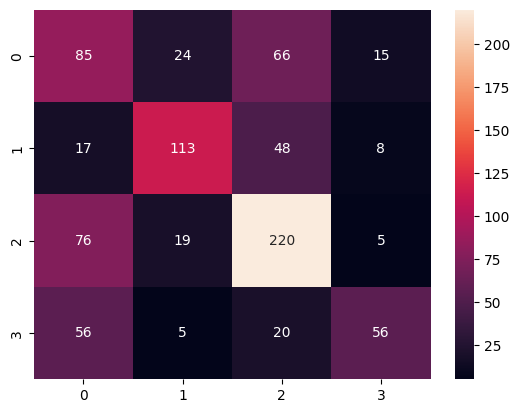

In [72]:
sns.heatmap(cm_default, annot=True,fmt=".0f")